# Python Notebook: Outliers and Data Scaling

# Outliers
**Definition**:
Outliers are data points that significantly deviate from the majority of data in a dataset.
They can skew results, distort statistical analyses, and impact machine learning models.


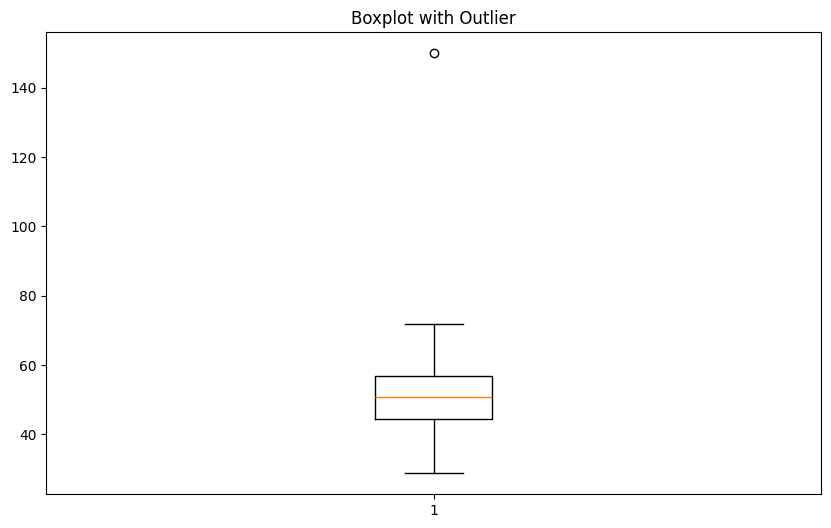

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Generate random data with an outlier
data = np.random.normal(loc=50, scale=10, size=100)
data = np.append(data, [150])  # Add an outlier

# Plot the data
plt.figure(figsize=(10, 6))
plt.boxplot(data)
plt.title("Boxplot with Outlier")
plt.show()

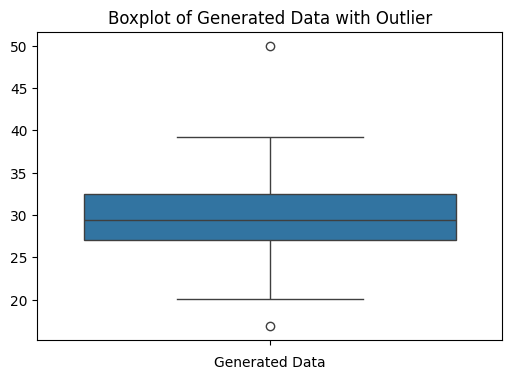

In [37]:
# Exercise: Generate your own data and visualize it
"""
Task:
1. Generate a dataset with a mean of 30 and standard deviation of 5.
2. Add an outlier to the dataset.
3. Plot the data using a boxplot.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate a dataset with mean=30 and std=5
np.random.seed(42)  # For reproducibility
data = np.random.normal(loc=30, scale=5, size=100)  # 100 data points

# Step 2: Add an outlier
data = np.append(data, 50)  # Adding an extreme value as an outlier

# Step 3: Plot the data using a boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=data)
plt.title("Boxplot of Generated Data with Outlier")
plt.xlabel("Generated Data")
plt.show()

## **Finding Outliers**

In [38]:
# Method 1: Interquartile Range (IQR)
def identify_outliers_iqr(data):
    q1, q3 = np.percentile(sorted(data), [25, 75])
    iqr = stats.iqr(data)
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers


outliers_iqr = identify_outliers_iqr(data)
print(f"Outliers using IQR: {outliers_iqr}")

Outliers using IQR: [16.901274479551276, 50.0]


In [39]:
# Exercise: Apply IQR to your dataset
"""
Task:
1. Rewrite the function identify_outliers_iqr without using 'np.percentile()' and 'stats.iqr()'
2. Compute the IQR for your generated dataset.
3. Print the outliers.
"""
import numpy as np

# Function to identify outliers using IQR without np.percentile() or stats.iqr()
def identify_outliers_iqr(data):
    sorted_data = sorted(data)  # Sort the data
    n = len(sorted_data)

    # Compute Q1 (25th percentile) manually
    q1_index = n // 4
    q1 = (sorted_data[q1_index - 1] + sorted_data[q1_index]) / 2 if n % 4 == 0 else sorted_data[q1_index]

    # Compute Q3 (75th percentile) manually
    q3_index = (3 * n) // 4
    q3 = (sorted_data[q3_index - 1] + sorted_data[q3_index]) / 2 if (3 * n) % 4 == 0 else sorted_data[q3_index]

    # Compute IQR
    iqr = q3 - q1

    # Compute lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

# Generate dataset with an outlier
np.random.seed(42)
data = np.random.normal(loc=30, scale=5, size=100)
data = np.append(data, 50)  # Add an outlier

# Identify outliers using IQR
outliers_iqr = identify_outliers_iqr(data)
print(f"Outliers using IQR: {outliers_iqr}")

Outliers using IQR: [16.901274479551276, 50.0]


In [40]:
# Method 2: Z-Score
def identify_outliers_zscore(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = stats.zscore(data)  # Calculate Z-scores using scipy
    outliers = [data[i] for i, z in enumerate(z_scores) if abs(z) > 3]
    return outliers


outliers_z = identify_outliers_zscore(data)
print(f"Outliers using Z-Score: {outliers_z}")

Outliers using Z-Score: [50.0]


In [41]:
# Exercise: Apply ZScore to your dataset
"""
Task:
1. Rewrite the function identify_outliers_zscore without using 'np.mean()' and 'np.std()' and 'stats.zscore()'
2. Compute the ZScore for your generated dataset.
3. Print the outliers.
"""
import numpy as np

def identify_outliers_zscore(data):
    # Manually calculating mean and standard deviation
    mean = sum(data) / len(data)
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    std_dev = variance ** 0.5

    # Calculate Z-scores manually
    z_scores = [(x - mean) / std_dev for x in data]

    # Identifying outliers (z-score > 3 or < -3)
    outliers = [data[i] for i, z in enumerate(z_scores) if abs(z) > 3]
    return outliers

outliers_z = identify_outliers_zscore(data)
print(f"Outliers using Z-Score: {outliers_z}")

Outliers using Z-Score: [50.0]


## **Handling Outliers**

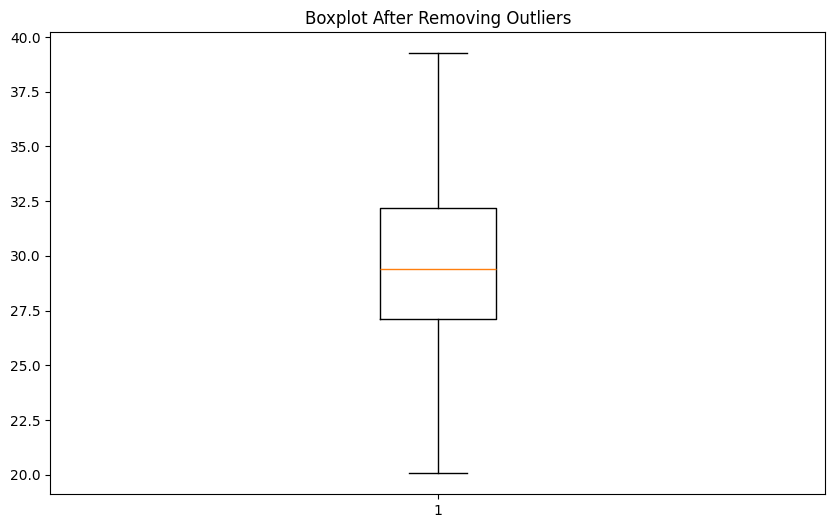

In [42]:
# Strategy 1: Removing Outliers
filtered_data = [x for x in data if x not in outliers_iqr]

plt.figure(figsize=(10, 6))
plt.boxplot(filtered_data)
plt.title("Boxplot After Removing Outliers")
plt.show()

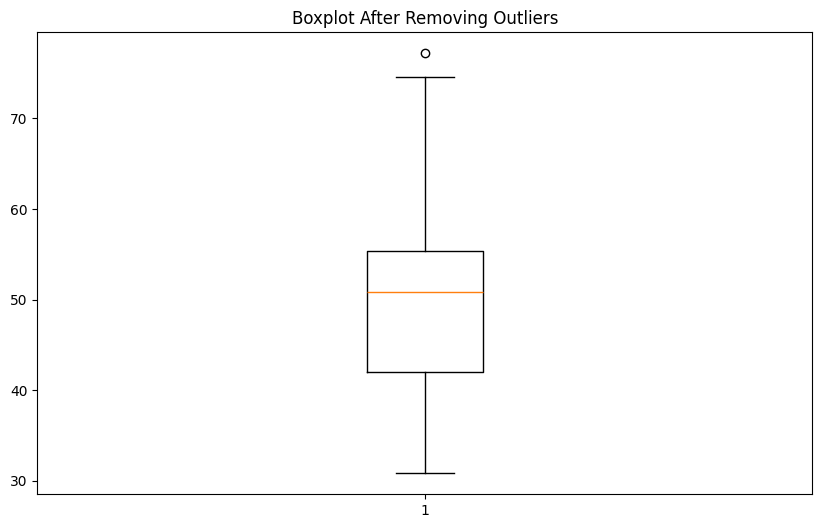

In [43]:
# Exercise: Remove outliers from your dataset and visualize the result
data = np.random.normal(loc=50, scale=10, size=100)
outliers = identify_outliers_zscore(data)
filtered_data = [x for x in data if x not in outliers]

plt.figure(figsize=(10, 6))
plt.boxplot(filtered_data)
plt.title("Boxplot After Removing Outliers")
plt.show()

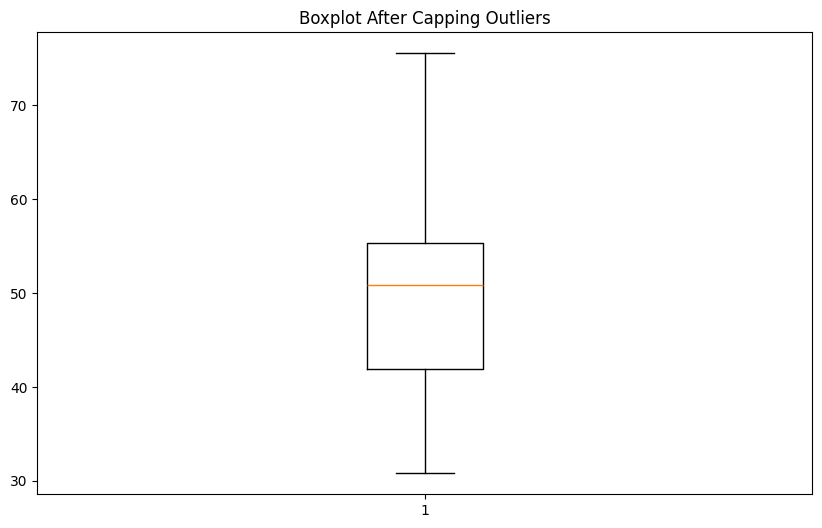

In [44]:
# Strategy 2: Capping Outliers
def cap_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return [
        lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
        for x in data
    ]


capped_data = cap_outliers(data)
plt.figure(figsize=(10, 6))
plt.boxplot(capped_data)
plt.title("Boxplot After Capping Outliers")
plt.show()

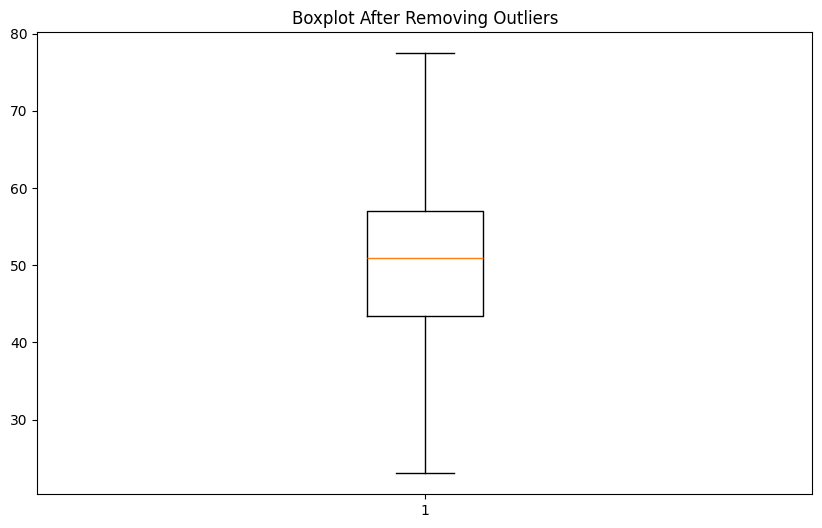

In [45]:
# Exercise: Cap outliers in your dataset and visualize the result

data = np.random.normal(loc=50, scale=10, size=100)
filtered_data = cap_outliers(data)

plt.figure(figsize=(10, 6))
plt.boxplot(filtered_data)
plt.title("Boxplot After Removing Outliers")
plt.show()

In [46]:
## Exercise (hard)
"""
In this exercise, we will detect and remove outliers based on logical rules rather than statistical methods.
The dataset consists of transaction records with customer age, purchase amount, number of items,
and membership type (Regular or Premium). Some transactions may be valid high-value purchases,
while others may be suspicious depending on the context.

Task
1. Identify suspicious transactions that don't align with typical customer behavior.
2. Implement rule-based outlier detection:
    - High purchase amounts from Regular members are more suspicious than from Premium members.
    - Younger customers making very large purchases could indicate an anomaly.
    - A single-item purchase with an unusually high amount is suspicious.
3. Extend the function to allow dynamic thresholds based on membership type and overall spending trends.

Example dataset:
transactions = [
    {"id": 101, "age": 25, "purchase_amount": 50, "num_items": 2, "membership": "Regular"},
    {"id": 102, "age": 65, "purchase_amount": 1000, "num_items": 1, "membership": "Premium"},
    {"id": 103, "age": 19, "purchase_amount": 5000, "num_items": 1, "membership": "Regular"},  # Suspicious
    {"id": 104, "age": 40, "purchase_amount": 120, "num_items": 5, "membership": "Regular"},
    {"id": 105, "age": 30, "purchase_amount": 20000, "num_items": 1, "membership": "Regular"}, # Suspicious
    {"id": 106, "age": 50, "purchase_amount": 300, "num_items": 10, "membership": "Premium"},
    {"id": 107, "age": 75, "purchase_amount": 4000, "num_items": 2, "membership": "Premium"},
]
"""
# Example dataset
transactions = [
    {"id": 101, "age": 25, "purchase_amount": 50, "num_items": 2, "membership": "Regular"},
    {"id": 102, "age": 65, "purchase_amount": 1000, "num_items": 1, "membership": "Premium"},
    {"id": 103, "age": 19, "purchase_amount": 5000, "num_items": 1, "membership": "Regular"},  # Suspicious
    {"id": 104, "age": 40, "purchase_amount": 120, "num_items": 5, "membership": "Regular"},
    {"id": 105, "age": 30, "purchase_amount": 20000, "num_items": 1, "membership": "Regular"}, # Suspicious
    {"id": 106, "age": 50, "purchase_amount": 300, "num_items": 10, "membership": "Premium"},
    {"id": 107, "age": 75, "purchase_amount": 4000, "num_items": 2, "membership": "Premium"},
]

# Rule-based outlier detection function
def detect_suspicious_transactions(transactions, high_purchase_threshold=1000, young_customer_threshold=30, high_value_single_item_threshold=1000):
    suspicious_transactions = []

    for transaction in transactions:
        age = transaction["age"]
        purchase_amount = transaction["purchase_amount"]
        num_items = transaction["num_items"]
        membership = transaction["membership"]

        # Rule 1: High purchase amounts from Regular members are more suspicious than from Premium members
        if membership == "Regular" and purchase_amount > high_purchase_threshold:
            suspicious_transactions.append(transaction)

        # Rule 2: Younger customers making very large purchases
        if age < young_customer_threshold and purchase_amount > high_purchase_threshold:
            suspicious_transactions.append(transaction)

        # Rule 3: A single-item purchase with an unusually high amount is suspicious
        if num_items == 1 and purchase_amount > high_value_single_item_threshold:
            suspicious_transactions.append(transaction)

    return suspicious_transactions


# Detect suspicious transactions
suspicious = detect_suspicious_transactions(transactions)

# Output suspicious transactions
print("Suspicious transactions detected:")
for transaction in suspicious:
    print(transaction)

# Optionally, remove suspicious transactions
clean_transactions = [transaction for transaction in transactions if transaction not in suspicious]

# Output cleaned dataset
print("\nCleaned transactions (outliers removed):")
for transaction in clean_transactions:
    print(transaction)

Suspicious transactions detected:
{'id': 103, 'age': 19, 'purchase_amount': 5000, 'num_items': 1, 'membership': 'Regular'}
{'id': 103, 'age': 19, 'purchase_amount': 5000, 'num_items': 1, 'membership': 'Regular'}
{'id': 103, 'age': 19, 'purchase_amount': 5000, 'num_items': 1, 'membership': 'Regular'}
{'id': 105, 'age': 30, 'purchase_amount': 20000, 'num_items': 1, 'membership': 'Regular'}
{'id': 105, 'age': 30, 'purchase_amount': 20000, 'num_items': 1, 'membership': 'Regular'}

Cleaned transactions (outliers removed):
{'id': 101, 'age': 25, 'purchase_amount': 50, 'num_items': 2, 'membership': 'Regular'}
{'id': 102, 'age': 65, 'purchase_amount': 1000, 'num_items': 1, 'membership': 'Premium'}
{'id': 104, 'age': 40, 'purchase_amount': 120, 'num_items': 5, 'membership': 'Regular'}
{'id': 106, 'age': 50, 'purchase_amount': 300, 'num_items': 10, 'membership': 'Premium'}
{'id': 107, 'age': 75, 'purchase_amount': 4000, 'num_items': 2, 'membership': 'Premium'}


# Data Scaling

## Standardization

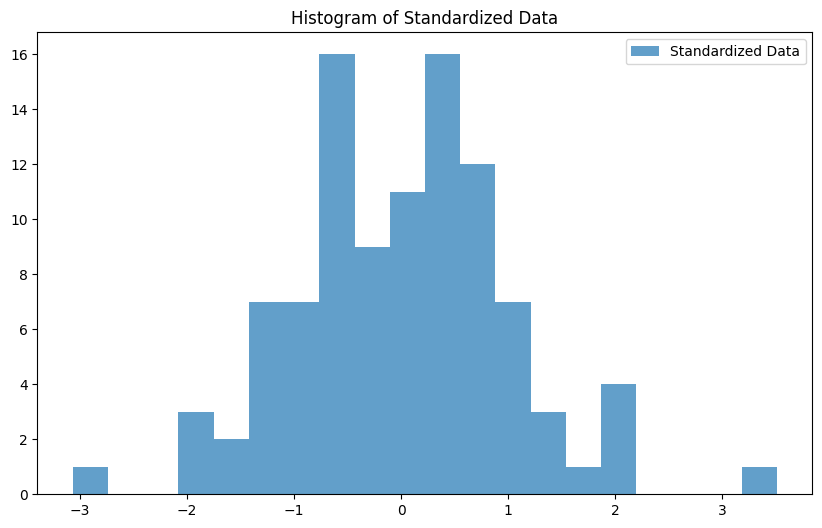

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(np.array(data).reshape(-1, 1))  # Reshape for single feature

plt.figure(figsize=(10, 6))
plt.hist(standardized_data, bins=20, alpha=0.7, label="Standardized Data")
plt.legend()
plt.title("Histogram of Standardized Data")
plt.show()

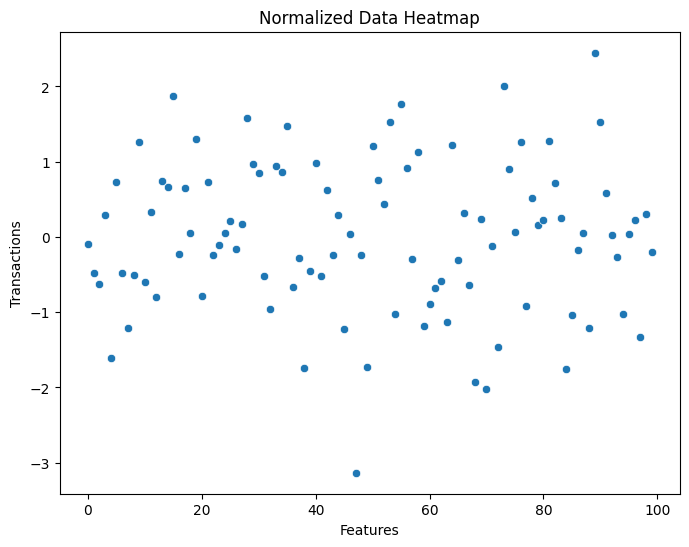

In [75]:
## Exercise:
"""
  1. Write your own standardization function instead of using the StandardScaler
  2. Standardize your dataset and visualize it
"""
def standardize_data(data_array):
    mean = np.mean(data_array)  # Compute mean of each column
    std_dev = np.std(data_array)  # Compute standard deviation of each column
    standardized_data = (data_array - mean) / std_dev  # Standardize by subtracting mean and dividing by std dev
    return standardized_data

data = np.random.normal(loc=30, scale=5, size=100)
normalized_data = standardize_data(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(normalized_data)
plt.title('Normalized Data Heatmap')
plt.xlabel('Features')
plt.ylabel('Transactions')
plt.show()


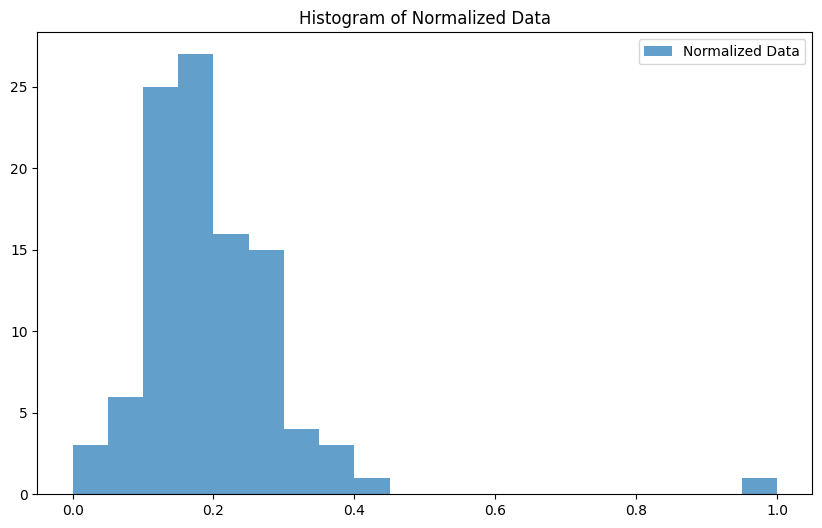

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(np.array(data).reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.hist(normalized_data, bins=20, alpha=0.7, label="Normalized Data")
plt.legend()
plt.title("Histogram of Normalized Data")
plt.show()

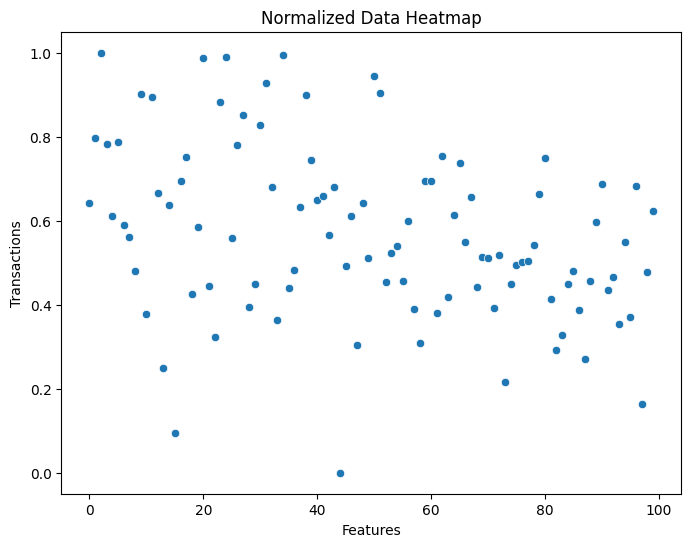

In [73]:
## Exercise:
"""
  1. Write your own normalization function instead of using the MinMaxScaler
  2. Normalize your dataset and visualize it
"""
def normalize_data(data_array):
    min_vals = np.min(data_array, axis=0)  # Minimum value for each column
    max_vals = np.max(data_array, axis=0)  # Maximum value for each column
    normalized_data = (data_array - min_vals) / (max_vals - min_vals)  # Apply Min-Max normalization
    return normalized_data

data = np.random.normal(loc=30, scale=5, size=100)
normalized_data = normalize_data(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(normalized_data)
plt.title('Normalized Data Heatmap')
plt.xlabel('Features')
plt.ylabel('Transactions')
plt.show()

In [16]:
## Exercise
"""
Experiment with other scaling techniques and normalization techniques and write down your findings.
https://scikit-learn.org/1.5/modules/preprocessing.html
"""


'\nExperiment with other scaling techniques and normalization techniques and write down your findings.\nhttps://scikit-learn.org/1.5/modules/preprocessing.html\n'

In [76]:
## Exercise
"""
  1. Load the Iris Dataset
  2. Remove Outliers
  3. Apply Standardization and/or Normalization (which one is best suited?)
"""
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Step 1: Load the Iris Dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Step 2: Remove outliers using Z-score method
z_scores = stats.zscore(iris_df)
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)  # Identify rows with any feature having Z-score > 3

# Remove outliers
iris_df_cleaned = iris_df[~outliers]

# Step 3: Apply Standardization
scaler = StandardScaler()
iris_standardized = scaler.fit_transform(iris_df_cleaned)  # Standardize the data

# Convert the standardized data back to a DataFrame
iris_standardized_df = pd.DataFrame(iris_standardized, columns=iris.feature_names)

# Display the cleaned and standardized dataset
print("Cleaned and Standardized Iris Dataset:")
print(iris_standardized_df.head())

# Optionally: Check the mean and standard deviation after standardization (should be close to 0 and 1)
print("\nMean after standardization (should be close to 0):")
print(iris_standardized_df.mean())
print("\nStandard Deviation after standardization (should be close to 1):")
print(iris_standardized_df.std())

Cleaned and Standardized Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444

Mean after standardization (should be close to 0):
sepal length (cm)   -4.736952e-16
sepal width (cm)    -7.815970e-16
petal length (cm)   -4.263256e-16
petal width (cm)    -4.736952e-16
dtype: float64

Standard Deviation after standardization (should be close to 1):
sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64
